In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

#check current directory
# print(os.getcwd())
# os.chdir('/onepanel/code/')

#import data cleaning modules
from data_cleaning import *

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 2000)

In [3]:
# # Can remove later. Just here to see debugging messages.
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.info("Debug mode enabled in this notebook")

# Get Data

`lte_turnover`: pulling in Limited Termed Employees turnover data by store

`reg_turnover`: pulling in paid hourly employees by store

`exec_turnover`: executive turnover by store

`manager_turnover`: store managers tenure at a particular store location

`shrinkage`: merged table of 2018 shrinkage metrics and 2011-2017 shrinkage metrics

In [4]:
lte_turnover = get_clean_turnover('2015-2017_LTE_Turnover_HC_Data.xlsx', use_cache = False)

print("Got {:,} Stores, with {} Months:".format(*lte_turnover.shape))
lte_turnover.dtypes

Got 1,229 Stores, with 37 Months:


store     int64
201501    int64
201502    int64
201503    int64
201504    int64
201505    int64
201506    int64
201507    int64
201508    int64
201509    int64
201510    int64
201511    int64
201512    int64
201601    int64
201602    int64
201603    int64
201604    int64
201605    int64
201606    int64
201607    int64
201608    int64
201609    int64
201610    int64
201611    int64
201612    int64
201701    int64
201702    int64
201703    int64
201704    int64
201705    int64
201706    int64
201707    int64
201708    int64
201709    int64
201710    int64
201711    int64
201712    int64
dtype: object

In [5]:
reg_turnover = get_clean_turnover('2015-2017 Reg Turnover_HC Data.xlsx', use_cache = False)

print("Got {:,} Stores, with {} Months:".format(*reg_turnover.shape))
print(reg_turnover.dtypes)

reg_turnover = reg_turnover.set_index('store')


Got 1,229 Stores, with 37 Months:
store     int64
201501    int64
201502    int64
201503    int64
201504    int64
201505    int64
201506    int64
201507    int64
201508    int64
201509    int64
201510    int64
201511    int64
201512    int64
201601    int64
201602    int64
201603    int64
201604    int64
201605    int64
201606    int64
201607    int64
201608    int64
201609    int64
201610    int64
201611    int64
201612    int64
201701    int64
201702    int64
201703    int64
201704    int64
201705    int64
201706    int64
201707    int64
201708    int64
201709    int64
201710    int64
201711    int64
201712    int64
dtype: object


In [6]:
exec_turnover = get_clean_turnover('2015-2017 Store Exec Turnover.xlsx', use_cache = False)

print("Got {:,} Stores, with {} Months:".format(*exec_turnover.shape))
exec_turnover.dtypes

Got 1,229 Stores, with 37 Months:


store     int64
201501    int64
201502    int64
201503    int64
201504    int64
201505    int64
201506    int64
201507    int64
201508    int64
201509    int64
201510    int64
201511    int64
201512    int64
201601    int64
201602    int64
201603    int64
201604    int64
201605    int64
201606    int64
201607    int64
201608    int64
201609    int64
201610    int64
201611    int64
201612    int64
201701    int64
201702    int64
201703    int64
201704    int64
201705    int64
201706    int64
201707    int64
201708    int64
201709    int64
201710    int64
201711    int64
201712    int64
dtype: object

In [7]:
manager_turnover = get_clean_manager_turnover('Store_Manager_13-17.xlsx', use_cache = False)

print("Got {:,} rows, with {} columns:".format(*manager_turnover.shape))
manager_turnover.dtypes

Got 5,847 rows, with 5 columns:


store                          int64
FSCL_YR_NBR                    int64
SM_TENURE _YRS               float64
SM_TENURE_YRS_IN_LOCATION    float64
SM_9-BOX                      object
dtype: object

In [8]:
shrinkage = get_clean_shrinkage(use_cache = False)

print("Got {:,} Stores, with {} columns:".format(*shrinkage.shape))
shrinkage.dtypes

Got 1,152 Stores, with 10 columns:


store           int64
store_name     object
2011           object
2012           object
2013           object
2014           object
2015           object
2016          float64
2017          float64
2018          float64
dtype: object

In [9]:
uia = pd.read_excel('UIA Data by Store-2007-2017.xlsx')
uia.dtypes

Territory                       int64
Region                          int64
District                        int64
Store                           int64
Store Name                     object
2017 UIA                       object
2017 Cutoff Units              object
2017 Adjusted Up Units         object
2017 Adjusted Down Units       object
2017 Total Unit Adjustments    object
2016 UIA                       object
2016 Cutoff Units              object
2016 Adjusted Up Units         object
2016 Adjusted Down Units       object
2016 Total Unit Adjustments    object
2015 UIA                       object
2015 Cutoff Units              object
2015 Adjusted Up Units         object
2015 Adjusted Down Units       object
2015 Total Unit Adjustments    object
2014 UIA                       object
2014 Cutoff Units              object
2014 Adjusted Up Units         object
2014 Adjusted Down Units       object
2014 Total Unit Adjustments    object
2013 UIA                       object
2013 Cutoff 

# Shrinkage

Distribution analysis of shrinkage

In [10]:
shrinkage.describe().T

,count,mean,std,min,25%,50%,75%,max
store,1152.0,745.665799,440.057370,7.000000,363.750000,678.500000,1152.250000,1530.000000
2016,942.0,-0.013221,0.008759,-0.059347,-0.018376,-0.011840,-0.006952,0.004921
2017,947.0,-0.011873,0.009491,-0.104637,-0.017076,-0.011086,-0.005767,0.010916
2018,359.0,-0.011900,0.008041,-0.044900,-0.016400,-0.010400,-0.006200,0.003900


In [11]:
#Number of stores that didnt take inventory
shrinkage.isnull().sum()

store           0
store_name      0
2011          215
2012          171
2013           37
2014          246
2015          209
2016          210
2017          205
2018          793
dtype: int64

In [12]:
shrinkage.head()

,store,store_name,2011,2012,2013,2014,2015,2016,2017,2018
1,7,MACOMB,-0.015348,-0.0170932,-0.0136181,-0.0116673,-0.0149347,-0.018183,-0.014996,-0.0122
2,8,OAKLAND SQUARE,-0.0123285,-0.0132213,-0.00681677,-0.00891957,-0.0123195,-0.011148,-0.013711,-0.0114
3,9,NOVI,-0.0062036,-0.00741198,-0.00608657,-0.00564281,NaN,-0.003438,-0.003537,-0.0049
4,10,LAKESIDE,-0.0088687,-0.0123767,-0.00653077,-0.00689249,-0.00742834,-0.006280,-0.007082,-0.0018
5,11,WESTLAND,NaN,-0.0105562,-0.0136246,-0.011707,-0.0102233,-0.013574,-0.008926,-0.0092


In [101]:
#dropping store name 
shrinkage_indexed = shrinkage.drop(columns=['store_name']).set_index('store').T

In [94]:
shrinkage_indexed.head()

store,7,8,9,10,11,14,17,18,19,25,31,32,33,34,35,37,39,41,43,48,49,52,54,55,57,59,60,62,63,64,65,66,67,68,70,71,72,73,75,77,79,82,83,84,86,89,91,95,96,97,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,117,118,119,121,123,125,126,127,129,130,132,134,136,138,139,140,141,142,143,147,148,149,153,154,155,156,158,159,160,161,162,163,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,183,184,185,186,187,188,189,190,191,192,193,195,196,197,198,200,201,202,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,251,252,253,254,255,256,257,258,259,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,295,296,297,298,299,301,302,303,304,305,306,307,308,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,401,402,403,405,406,407,408,409,411,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,1456,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,555,556,557,558,559,560,562,563,564,565,567,568,569,570,571,574,575,576,577,579,580,581,583,584,585,586,587,588,589,590,591,...,759,760,761,762,763,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,795,796,797,798,799,951,952,953,954,955,956,957,958,960,962,963,964,967,968,969,970,971,973,974,975,976,977,978,980,981,982,983,985,986,987,988,989,990,991,992,993,994,995,996,997,998,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1055,1056,1057,1058,1059,1060,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1075,1076,1077,1078,1079,1081,1082,1083,1084,1085,1086,1087,1089,1091,1092,1093,1094,1095,1096,1097,1098,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1115,1117,1118,1119,1121,1122,1123,1124,1125,1126,1127,1128,1130,1132,1133,1134,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1149,1151,1152,1153,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1207,1209,1211,1212,1215,1216,1217,1219,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1240,1241,1242,1243,1245,1246,1248,1249,1250,1253,1255,1256,1257,1261,1262,1264,1265,1266,1267,1268,1269,1270,1271,1272,1275,1276,1277,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1290,1291,1292,1293,1294,1295,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1312,1313,1314,1315,1316,1317,1318,1319,1320,1322,1324,1325,1326,1327,1328,1329,1330,1331,1332,1334,1340,1342,1343,1347,1349,1350,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1247,1370,1371,1372,1373,1374,1135,1376,1377,1378,1379,1381,1382,1383,531,1385,1386,1054,1388,1389,1390,1391,1393,1394,1395,1396,1397,1399,1400,1401,1403,1404,1405,1407,1408,1409,1410,1411,1413,1414,1415,1

In [15]:
#flip axis and fill missing data with last years shrinkage number
# shrinkage_filled = shrinkage_indexed.fillna(shrinkage_indexed.mean())
shrinkage_filled = shrinkage_indexed.fillna(method = 'ffill')
shrinkage_filled = shrinkage_filled.fillna(method = 'bfill')

#flip axis back
shrinkage_filled = shrinkage_filled.T
shrinkage_filled.head()

,2011,2012,2013,2014,2015,2016,2017,2018
store,,,,,,,,
7,-0.015348,-0.017093,-0.013618,-0.011667,-0.014935,-0.018183,-0.014996,-0.0122
8,-0.012329,-0.013221,-0.006817,-0.008920,-0.012320,-0.011148,-0.013711,-0.0114
9,-0.006204,-0.007412,-0.006087,-0.005643,-0.005643,-0.003438,-0.003537,-0.0049
10,-0.008869,-0.012377,-0.006531,-0.006892,-0.007428,-0.006280,-0.007082,-0.0018
11,-0.010556,-0.010556,-0.013625,-0.011707,-0.010223,-0.013574,-0.008926,-0.0092


In [ ]:
#print null values
print(shrinkage_filled.isnull().sum())

In [117]:
# shrinkage_indexed.isna().sum().sort_values(ascending = False)

In [17]:
shrinkage_filled.describe()
# shrinkage_filled.head()

,2011,2012,2013,2014,2015,2016,2017,2018
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.013731,-0.013495,-0.011148,-0.011191,-0.011094,-0.011333,-0.010699,-0.010426
std,0.011039,0.010157,0.008294,0.008374,0.008748,0.009624,0.009107,0.009131
min,-0.104637,-0.104637,-0.104637,-0.104637,-0.104637,-0.104637,-0.104637,-0.104637
25%,-0.018377,-0.018472,-0.015609,-0.015530,-0.015298,-0.016826,-0.015590,-0.015405
50%,-0.011414,-0.011596,-0.010225,-0.010140,-0.009895,-0.009814,-0.009609,-0.009209
75%,-0.006670,-0.006847,-0.005795,-0.005817,-0.005786,-0.004585,-0.004576,-0.004243
max,0.035773,0.028859,0.021112,0.011526,0.011487,0.011487,0.010916,0.010916


In [118]:
#test certain locations
test = shrinkage_indexed.T.reset_index()
test[test['store'] == 1530]


,store,2011,2012,2013,2014,2015,2016,2017,2018
1151,1530,NaN,NaN,NaN,NaN,NaN,NaN,-0.104637,NaN


In [19]:
#dropping high shrink store since its an outlier
shrinkage_filled.drop(1530, inplace = True)
shrinkage_filled = shrinkage_filled.reset_index()

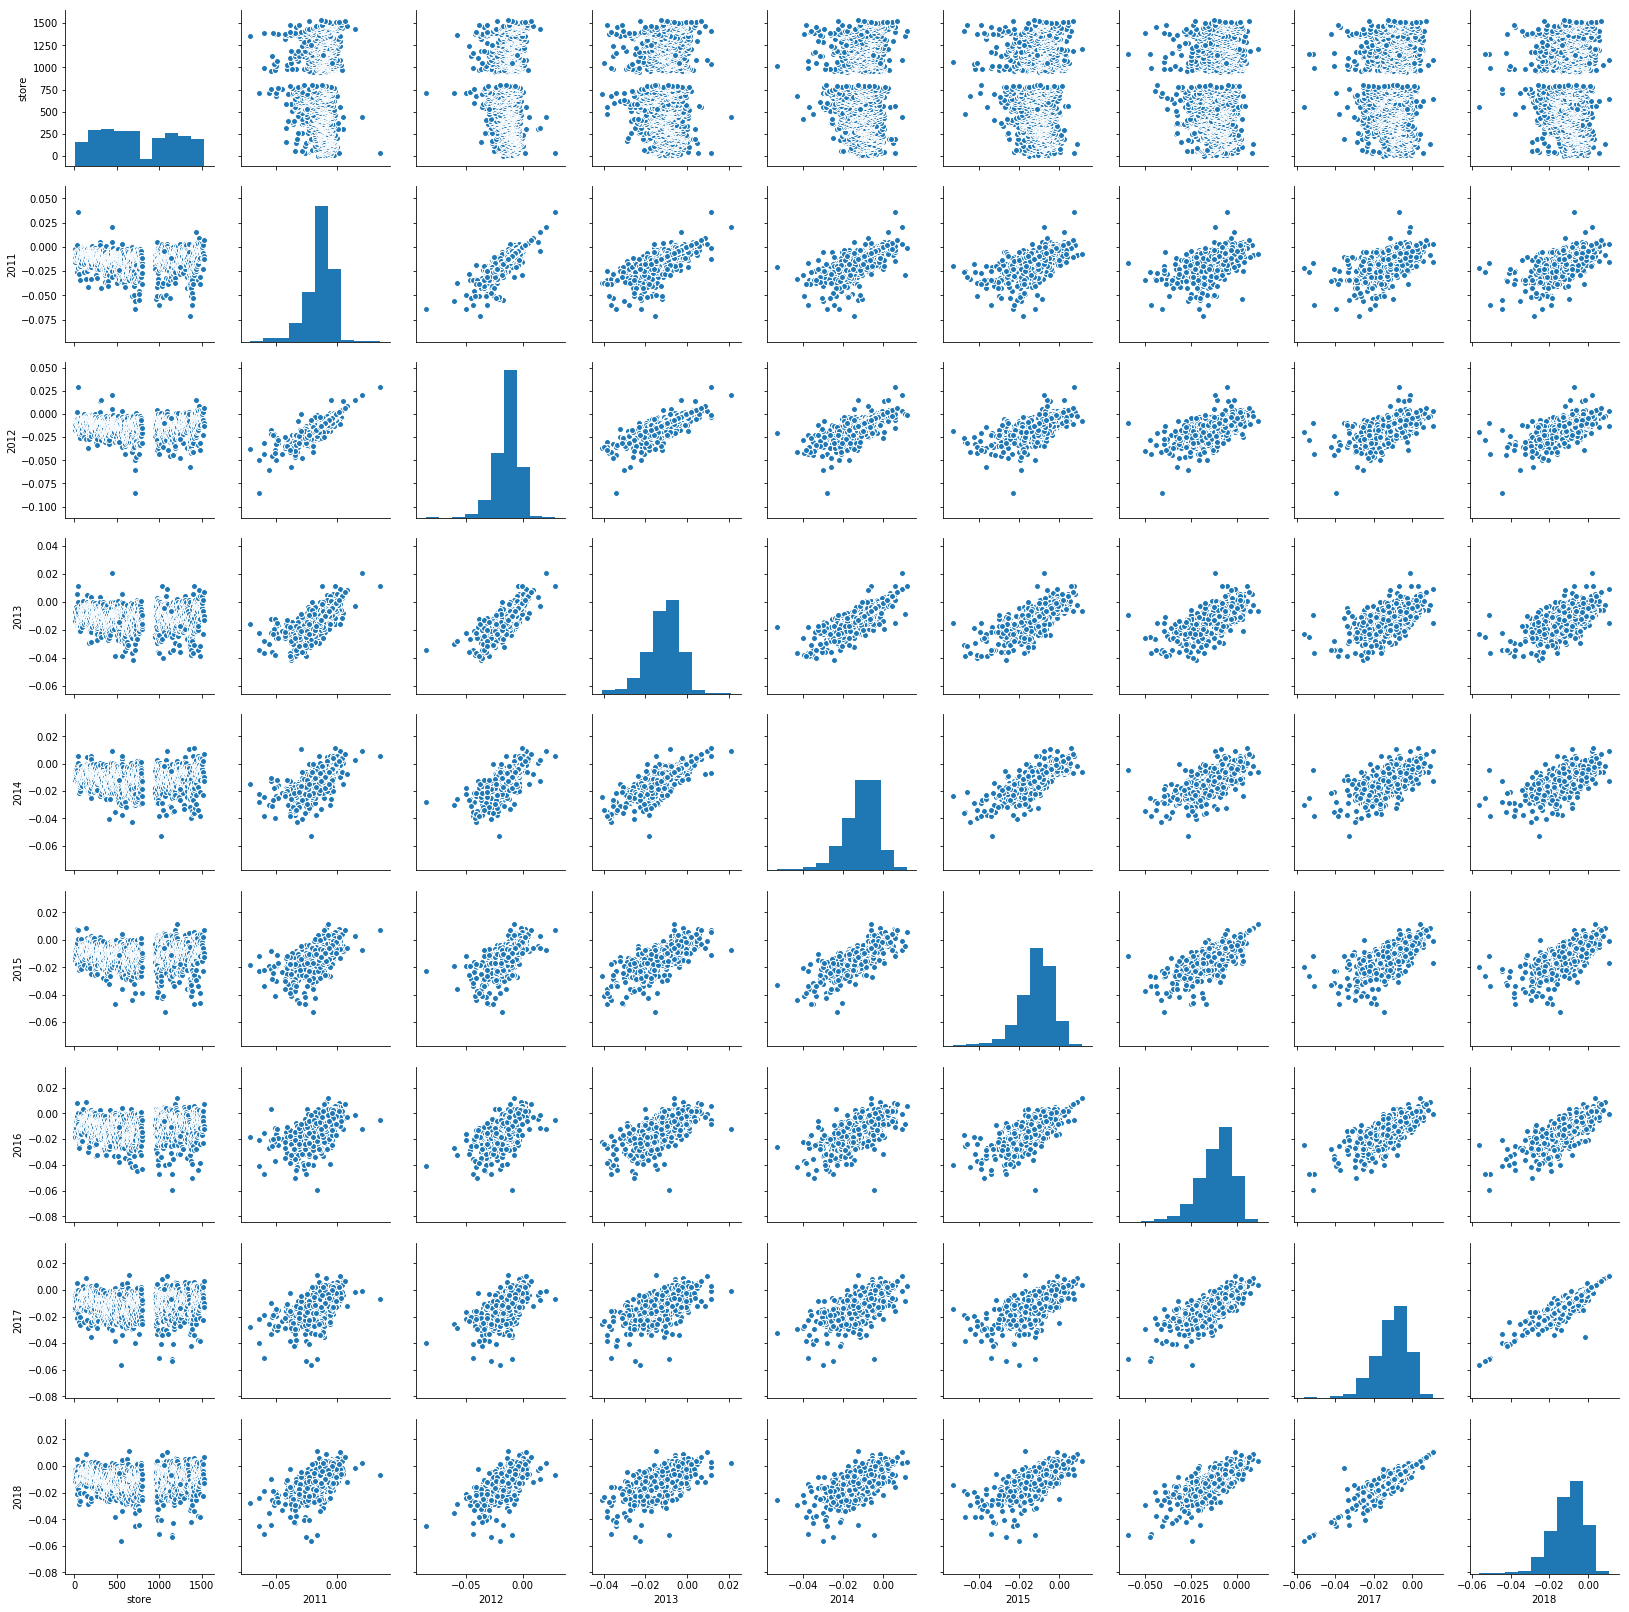

In [20]:
sns.pairplot(shrinkage_filled)

          store      2011      2012      2013      2014      2015      2016      2017      2018
store  1.000000 -0.059414 -0.029312 -0.028580 -0.023018 -0.047924  0.040343 -0.022040 -0.046262
2011  -0.059414  1.000000  0.882062  0.754993  0.692100  0.651859  0.607728  0.617227  0.648074
2012  -0.029312  0.882062  1.000000  0.823050  0.745829  0.700901  0.663076  0.635715  0.660987
2013  -0.028580  0.754993  0.823050  1.000000  0.828504  0.760891  0.702660  0.670842  0.677996
2014  -0.023018  0.692100  0.745829  0.828504  1.000000  0.818824  0.729338  0.699560  0.695976
2015  -0.047924  0.651859  0.700901  0.760891  0.818824  1.000000  0.796467  0.734277  0.726860
2016   0.040343  0.607728  0.663076  0.702660  0.729338  0.796467  1.000000  0.820289  0.808489
2017  -0.022040  0.617227  0.635715  0.670842  0.699560  0.734277  0.820289  1.000000  0.947830
2018  -0.046262  0.648074  0.660987  0.677996  0.695976  0.726860  0.808489  0.947830  1.000000


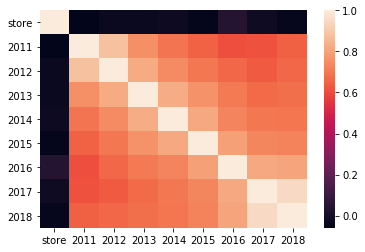

In [21]:
corr = shrinkage_filled.corr()
print(corr)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [72]:
#finding values that are positive
shrinkage_indexed.T[shrinkage_indexed.T> 0].count()

2011    25
2012    19
2013    54
2014    16
2015    66
2016    20
2017    76
2018    13
dtype: int64

When does this happen? Kohls has stores that have postive shrinkage year over year.  This is because when they have extra inventory at the Distribution center, they will send that to a certain store causing it to have positive shrinkage

In [ ]:
from fancyimpute import MICE
import random

def estimate_by_mice(df):
        df_estimated_var = df.copy()
        random.seed(129)
        mice = MICE(n_imputations=10)
        res = mice.complete(np.asarray(df.values, dtype=float))
        df_estimated_var.loc[:, df.columns] = res[:][:]
        return df_estimated_var
    
estimate_by_mice(shrinkage_indexed)


[MICE] Completing matrix with shape (8, 1152)
[MICE] Starting imputation round 1/20, elapsed time 0.017
[MICE] Starting imputation round 2/20, elapsed time 112.439
[MICE] Starting imputation round 3/20, elapsed time 225.693
[MICE] Starting imputation round 4/20, elapsed time 337.771
[MICE] Starting imputation round 5/20, elapsed time 450.371


# Executive Turnover

In [22]:
exec_turnover.head()

,store,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
0,7,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,6,5,5,5,4
1,8,4,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,9,4,4,4,4,4,4,4,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,10,5,5,5,5,5,5,5,5,5,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,11,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,4,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5


In [23]:
exec_turnover.isnull().sum()

store     0
201501    0
201502    0
201503    0
201504    0
201505    0
201506    0
201507    0
201508    0
201509    0
201510    0
201511    0
201512    0
201601    0
201602    0
201603    0
201604    0
201605    0
201606    0
201607    0
201608    0
201609    0
201610    0
201611    0
201612    0
201701    0
201702    0
201703    0
201704    0
201705    0
201706    0
201707    0
201708    0
201709    0
201710    0
201711    0
201712    0
dtype: int64

In [24]:
exec_turnover = exec_turnover.set_index('store')

In [25]:
#change exec_turnover to show change over time
exec_turnover_time = exec_turnover.iloc[:,24:36].copy()
remove = exec_turnover_time.iloc[:,0].copy()
for i in range(len(exec_turnover_time.columns)):
    exec_turnover_time.iloc[:,i] = exec_turnover_time.iloc[:,i] - remove
    
exec_turnover_time[exec_turnover_time.iloc[:,11] == -2]

,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
store,,,,,,,,,,,,
72,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-2,-2
261,0,-1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
268,0,-2,-2,-2,-2,-1,-2,-1,-2,-2,-2,-2
277,0,-1,-1,-2,-1,-1,-1,-1,-1,-1,-1,-2
331,0,-1,-2,-2,-2,0,0,0,-2,-2,-2,-2
351,0,0,0,0,0,-1,-1,-1,0,0,-1,-2
554,0,0,0,0,0,0,0,0,-2,-2,-2,-2
658,0,0,-2,-2,-1,-1,-1,-1,-1,-1,-1,-2
795,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,-2


# LTE Turnover

In [26]:
lte_turnover.head()

,store,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
0,7,8,0,2,5,10,15,16,0,0,73,84,56,28,24,22,1,0,1,0,0,13,59,64,58,0,0,0,0,0,0,0,0,32,55,101,69
1,8,7,0,4,15,15,18,16,0,0,41,69,42,19,18,16,7,4,0,0,0,5,24,60,61,0,0,0,0,0,0,0,0,12,28,81,52
2,9,4,0,3,7,9,17,9,1,0,16,61,33,18,17,15,7,0,0,0,0,7,31,54,47,0,0,0,0,0,0,0,0,13,25,56,50
3,10,6,0,8,13,22,27,33,0,0,24,77,97,28,26,21,10,0,0,0,0,3,34,79,39,0,0,0,0,0,0,0,0,18,47,60,73
4,11,5,5,16,22,25,27,30,0,0,44,88,32,30,27,21,6,0,2,1,0,13,57,91,41,0,0,0,0,0,0,0,0,43,61,79,61


# Regular Turnover

Questions:  What SQ foot can one person cover in a store?  Can we get the sq foot of each store?

In [27]:
reg_turnover.head()

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,168,165,160,154,152,151,147,157,164,164,156,151,145,144,147,165,167,158,160,163,158,149,148,146,169,164,163,164,170,155,159,154,154,149,149,142
8,140,144,135,132,129,127,132,147,157,155,152,139,135,129,134,144,149,146,153,155,146,141,138,134,148,145,152,151,150,147,155,152,143,136,135,127
9,135,138,133,128,123,123,126,134,136,140,141,127,119,118,118,125,131,130,127,128,124,126,124,120,138,136,136,132,136,133,133,128,120,114,112,107
10,169,170,163,161,158,163,162,180,196,184,178,175,161,156,155,164,166,168,171,156,156,148,142,132,165,164,162,158,161,157,168,164,159,154,150,142
11,139,140,133,126,127,123,125,153,142,135,131,124,116,116,124,137,143,150,154,149,149,141,135,124,156,153,151,152,153,143,150,150,143,132,123,116


In [28]:
#these stores dont have shrinkage numbers/ are outdated stores
drop = reg_turnover[reg_turnover.iloc[:,0] == 0].index
drop.append(reg_turnover[reg_turnover.iloc[:,35]== 0].index)

reg_turnover.drop(drop, inplace = True)

In [29]:
reg_turnover.describe()

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,87.049828,91.192440,87.433849,83.556701,81.013746,79.890034,79.832474,98.364261,99.193299,96.982818,94.751718,87.456186,82.644330,82.201890,84.030069,89.019759,91.658935,91.651203,92.695017,91.376289,91.461340,87.262887,83.843643,79.916667,98.175258,95.273196,93.553265,92.832474,91.360825,91.644330,92.678694,90.728522,86.024914,82.058419,78.786942,75.653780
std,27.710286,27.997096,27.289346,26.426609,25.883591,25.776537,25.920381,29.661193,29.848334,29.335660,29.245650,27.292259,25.725129,25.083893,25.252873,26.220058,26.702134,28.940274,28.871893,28.242428,28.223151,27.173237,26.639750,25.775786,29.358815,28.536277,28.589178,28.534759,28.476846,28.565575,29.356056,28.427915,27.286548,26.494277,25.814424,25.128654
min,10.000000,10.000000,10.000000,30.000000,25.000000,25.000000,28.000000,48.000000,43.000000,46.000000,43.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,72.000000,69.000000,65.000000,63.000000,61.000000,62.000000,78.000000,79.000000,77.000000,74.000000,68.000000,65.000000,65.000000,67.000000,71.000000,74.000000,74.000000,75.000000,74.750000,74.000000,71.000000,68.000000,65.000000,81.000000,78.000000,76.000000,75.000000,74.000000,74.000000,75.000000,74.000000,69.000000,66.000000,63.000000,60.000000
50%,83.000000,86.000000,83.000000,79.000000,76.000000,75.000000,74.000000,91.000000,93.000000,91.000000,89.000000,82.000000,78.000000,76.000000,78.000000,83.000000,86.000000,87.000000,88.000000,87.000000,87.000000,83.000000,79.000000,76.000000,93.000000,91.000000,89.000000,88.000000,87.000000,86.000000,87.000000,85.000000,82.000000,78.000000,75.000000,71.000000
75%,101.000000,106.000000,101.250000,97.000000,95.000000,93.000000,94.000000,112.000000,113.000000,111.000000,108.000000,100.250000,95.250000,95.000000,96.000000,102.000000,105.000000,106.000000,107.000000,106.000000,106.000000,102.000000,98.000000,93.000000,113.000000,111.000000,109.000000,109.000000,106.250000,107.000000,108.000000,105.000000,100.000000,96.000000,93.000000,89.000000
max,269.000000,259.000000,247.000000,239.000000,228.000000,237.000000,242.000000,309.000000,327.000000,309.000000,289.000000,258.000000,245.000000,229.000000,222.000000,260.000000,263.000000,263.000000,253.000000,253.000000,255.000000,241.000000,230.000000,213.000000,273.000000,265.000000,260.000000,259.000000,257.000000,261.000000,269.000000,265.000000,256.000000,245.000000,241.000000,232.000000


In [30]:
#change reg_turnover to show change over time
reg_turnover_time = reg_turnover.iloc[:,24:36].copy()
remove = reg_turnover_time.iloc[:,0].copy()
for i in range(len(reg_turnover_time.columns)):
    reg_turnover_time.iloc[:,i] = reg_turnover_time.iloc[:,i] - remove
    
reg_turnover_time.head()

,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712
store,,,,,,,,,,,,
7,0,-5,-6,-5,1,-14,-10,-15,-15,-20,-20,-27
8,0,-3,4,3,2,-1,7,4,-5,-12,-13,-21
9,0,-2,-2,-6,-2,-5,-5,-10,-18,-24,-26,-31
10,0,-1,-3,-7,-4,-8,3,-1,-6,-11,-15,-23
11,0,-3,-5,-4,-3,-13,-6,-6,-13,-24,-33,-40


# Data Transformation and Cont. Cleaning

In [31]:
shrinkage_CC = shrinkage_filled.set_index('store')

#changing naming conventions
def change_header(data, string = ''):
    ans = data.copy()
    i = 0
    for i in range(0,len(ans.columns)):
        ans.rename(columns = {ans.columns[i]: string + str(ans.columns[i])}, inplace = True)
        
    return ans


#create new data frames with new naming conventions
reg_turnover_CC = change_header(reg_turnover_time,'reg_')
lte_turnover_CC = change_header(lte_turnover,'lte_')
exec_turnover_CC = change_header(exec_turnover_time,'exec_')
shrinkage_CC = change_header(shrinkage_CC,'shrink_')

In [32]:
shrinkage_CC.head().dtypes

shrink_2011    float64
shrink_2012    float64
shrink_2013    float64
shrink_2014    float64
shrink_2015    float64
shrink_2016    float64
shrink_2017    float64
shrink_2018    float64
dtype: object

# Variable Selection

In [33]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm


X = shrinkage_CC.iloc[:,0:7].astype(float)
y = shrinkage_CC.iloc[:,7].astype(float)


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  shrink_2017                    with p-value 0.0
Add  shrink_2011                    with p-value 4.94074e-18
Add  shrink_2016                    with p-value 4.41353e-05
resulting features:
['shrink_2017', 'shrink_2011', 'shrink_2016']


/home/onepanel/.conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


# Building Initial Model

This will be our baseline model just using previous years shrinkage.  Below will be a OLS regression.  

In [34]:
# linear regression 
x = shrinkage_CC.iloc[:,2:7].astype(float)
y = shrinkage_CC.iloc[:,7].astype(float)

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            shrink_2018   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     5464.
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:25:37   Log-Likelihood:                 5169.4
No. Observations:                1151   AIC:                        -1.033e+04
Df Residuals:                    1146   BIC:                        -1.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
shrink_2013     0.0546      0.019      2.903      

The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.


lasso or ridge regression
Pandas MICE
Talk to gas day data science peps
Talk to people who build forecasting models

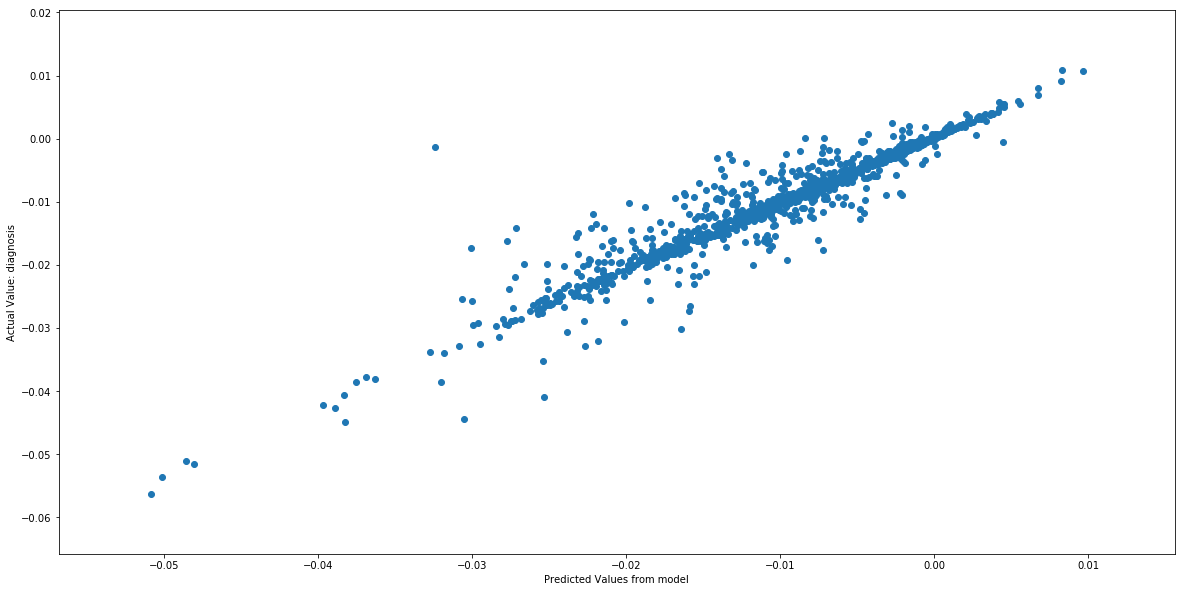

In [35]:
import matplotlib.pyplot as plt

predictions = model.predict(x)
plt.figure(figsize = (20,10))
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: diagnosis")
plt.show()

In [36]:
#confidence interval
model.conf_int(alpha=0.05, cols=None)

,0,1
shrink_2013,0.017709,0.091585
shrink_2014,-0.041339,0.041895
shrink_2015,-0.033493,0.044149
shrink_2016,0.026064,0.095488
shrink_2017,0.819418,0.885307


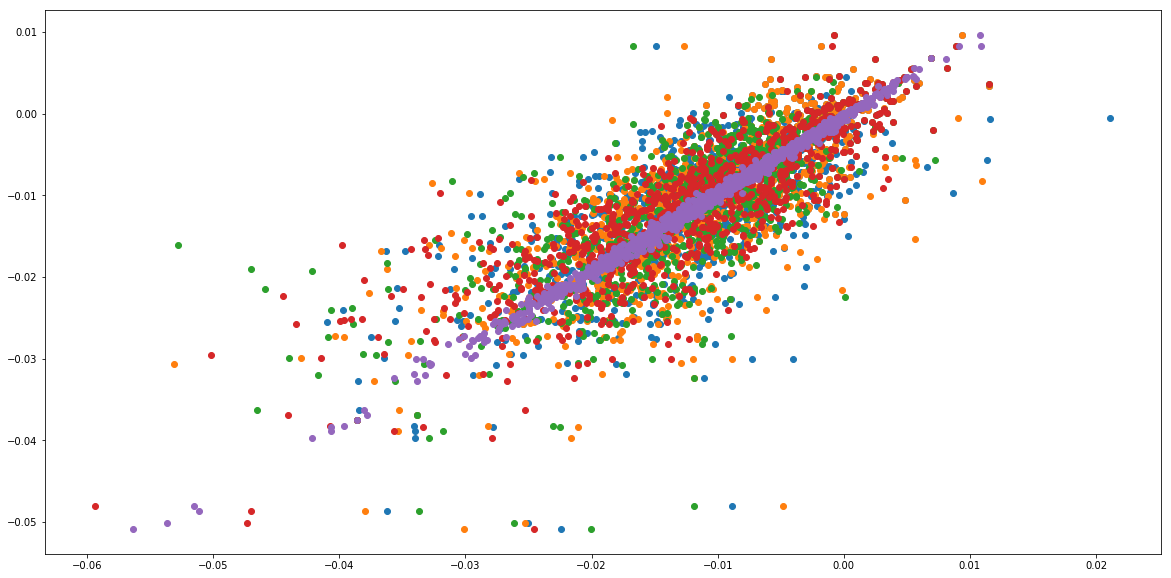

In [37]:
plt.figure(figsize=(20,10))
plt.plot(x, model.fittedvalues, 'o')
plt.show()

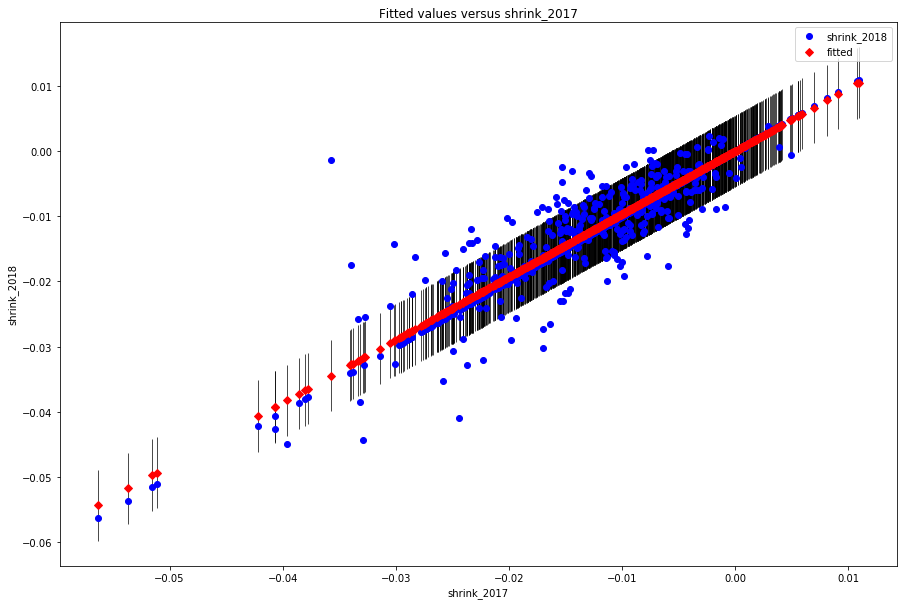

In [38]:

X = shrinkage_CC.iloc[:,6:7]
Y = shrinkage_CC.iloc[:,7]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

In [39]:
predictions.head()

store
7    -0.014714
8    -0.012805
9    -0.003588
10   -0.006817
11   -0.009235
dtype: float64

In [40]:
test = pd.DataFrame(predictions).reset_index()
test[test['store'] == 225]

,store,0
154,225,-0.004672


In [41]:
Y.head()

store
7    -0.0122
8    -0.0114
9    -0.0049
10   -0.0018
11   -0.0092
Name: shrink_2018, dtype: float64

In [42]:
test = pd.DataFrame(Y).reset_index()
test[test['store'] == 255]

,store,shrink_2018
183,255,0.0006


In [43]:
import sklearn.cross_validation

X = shrinkage_CC.iloc[:,:7].astype(float)
Y = shrinkage_CC.iloc[:,7].astype(float)

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(920, 7)
(231, 7)
(920,)
(231,)


/home/onepanel/.conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_train)
Y_pred[:5]

array([-0.0136021 ,  0.00076322, -0.00668673, -0.01042932, -0.00494738])

In [45]:
#From trained data: 80% split
print(sklearn.metrics.mean_squared_error(Y_train, lm.predict(X_train)))

7.569979722416236e-06


In [46]:
#From test data: 20% split
print(sklearn.metrics.mean_squared_error(Y_test, lm.predict(X_test)))

5.225248772768458e-06


Text(0.5,1,'2018 vs Predicted 2018: $Y_i$ vs $\\hat{Y}_i$')

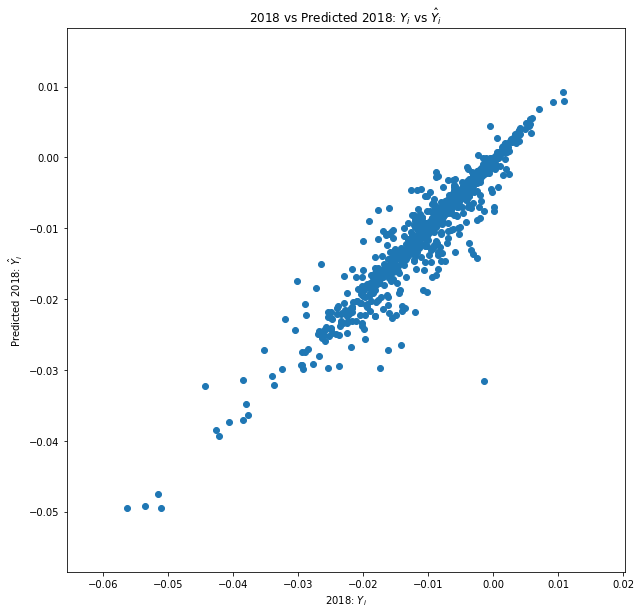

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, Y_pred)
plt.xlabel("2018: $Y_i$")
plt.ylabel("Predicted 2018: $\hat{Y}_i$")
plt.title("2018 vs Predicted 2018: $Y_i$ vs $\hat{Y}_i$")

In [48]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [49]:
#Perform 10-fold cross validation
scores = cross_val_score(model, X, Y, cv=10)
print("Cross-validated scores: ", scores)

Cross-validated scores:  [0.88909442 0.50832923 0.75253325 0.8151871  0.960878   0.88470554
 0.90588781 0.95120082 0.97462729 0.98679424]


In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.27)


Text(0.5,1,'2018 vs Predicted 2018: $Y_i$ vs $\\hat{Y}_i$')

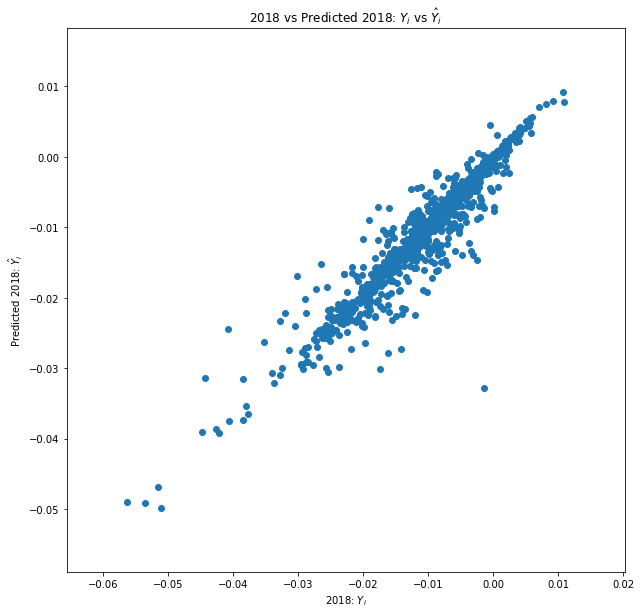

In [51]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, Y, cv=10)

plt.figure(figsize=(10,10))
plt.scatter(Y, predictions)
plt.xlabel("2018: $Y_i$")
plt.ylabel("Predicted 2018: $\hat{Y}_i$")
plt.title("2018 vs Predicted 2018: $Y_i$ vs $\hat{Y}_i$")

In [52]:
accuracy = metrics.r2_score(Y, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  0.9008319133191577


In [53]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(Y, predictions)

48.10053764836396

# Adding Varibles to the model

notes: reg_turnover and excutive turnover didnt add any signifcance to the model - not sure how to use it.

In [54]:
#combine shrinkage and reg_turnover_cc
combined = exec_turnover_CC.merge(shrinkage_CC, on = 'store', how = 'inner')
combined.head()

,exec_201701,exec_201702,exec_201703,exec_201704,exec_201705,exec_201706,exec_201707,exec_201708,exec_201709,exec_201710,exec_201711,exec_201712,shrink_2011,shrink_2012,shrink_2013,shrink_2014,shrink_2015,shrink_2016,shrink_2017,shrink_2018
store,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,1,0,0,0,-1,-0.015348,-0.017093,-0.013618,-0.011667,-0.014935,-0.018183,-0.014996,-0.0122
8,0,0,0,0,0,0,0,0,0,0,0,0,-0.012329,-0.013221,-0.006817,-0.008920,-0.012320,-0.011148,-0.013711,-0.0114
9,0,0,0,0,0,0,0,0,0,0,0,0,-0.006204,-0.007412,-0.006087,-0.005643,-0.005643,-0.003438,-0.003537,-0.0049
10,0,0,0,0,0,0,0,0,0,0,0,0,-0.008869,-0.012377,-0.006531,-0.006892,-0.007428,-0.006280,-0.007082,-0.0018
11,0,0,0,0,1,1,1,1,1,1,1,1,-0.010556,-0.010556,-0.013625,-0.011707,-0.010223,-0.013574,-0.008926,-0.0092


In [55]:
# combined.isna().sum()
len(combined.columns)

20

In [56]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm


X = combined.iloc[:,0:19].astype(float)
y = combined.iloc[:,19].astype(float)


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  shrink_2017                    with p-value 0.0


/home/onepanel/.conda/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/onepanel/.conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/onepanel/.conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/onepanel/.conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/onepanel/.conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minim

Add  shrink_2011                    with p-value 4.94074e-18
Add  shrink_2016                    with p-value 4.41353e-05
resulting features:
['shrink_2017', 'shrink_2011', 'shrink_2016']


In [57]:
# linear regression 
x = combined.iloc[:,[11,18]].astype(float)
y = combined.iloc[:,19].astype(float)

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            shrink_2018   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:25:40   Log-Likelihood:                 5141.9
No. Observations:                1151   AIC:                        -1.028e+04
Df Residuals:                    1149   BIC:                        -1.027e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
exec_201712 -8.262e-05      0.000     -0.434      

In [58]:
shrinkage_CC.to_csv('shrinkage.csv')